### Pre-processing

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
df=pd.read_csv('HR_attrition_dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [4]:
df1=df.copy()

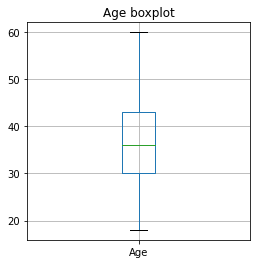

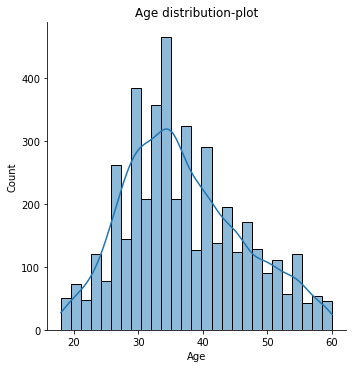

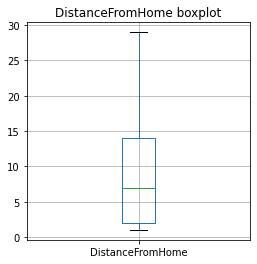

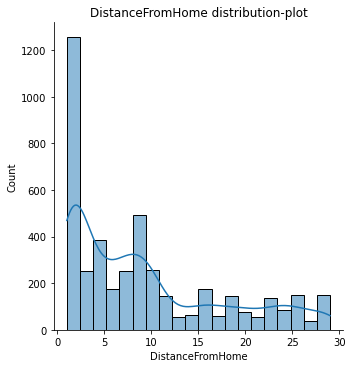

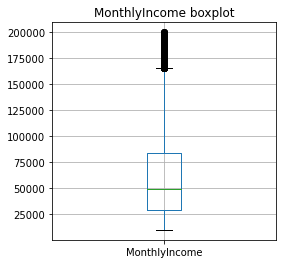

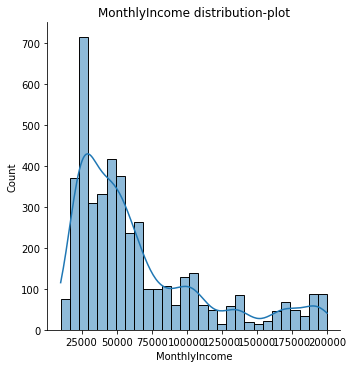

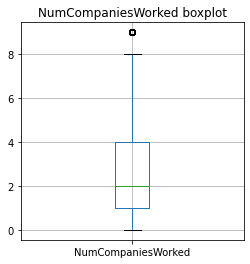

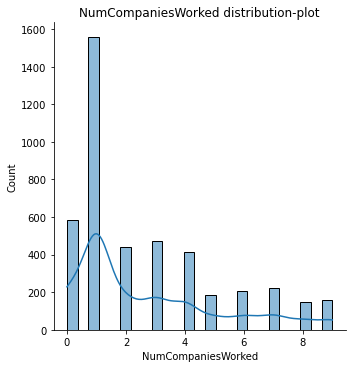

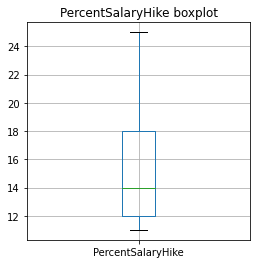

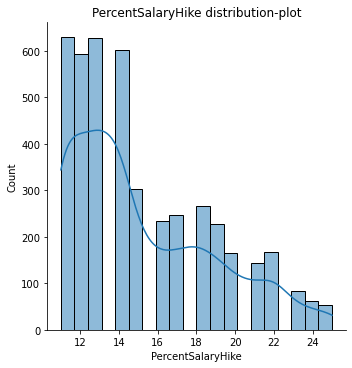

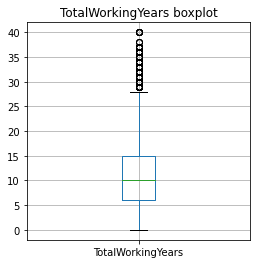

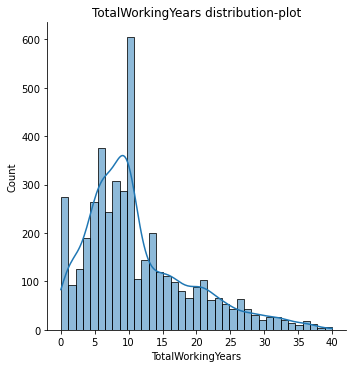

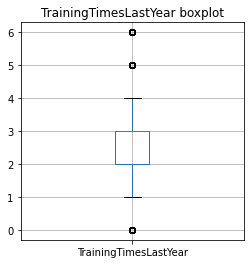

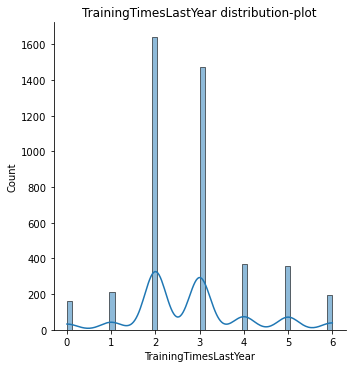

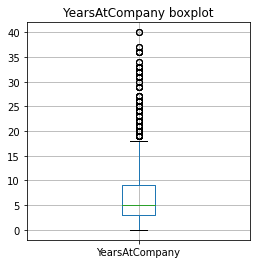

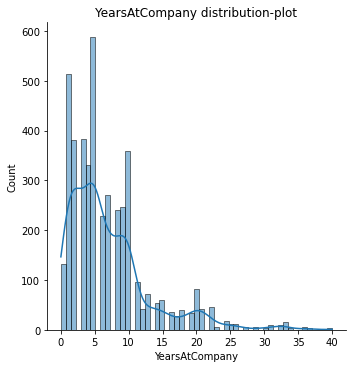

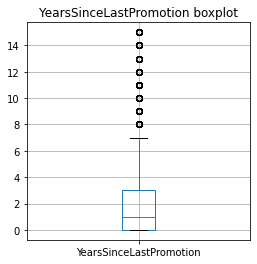

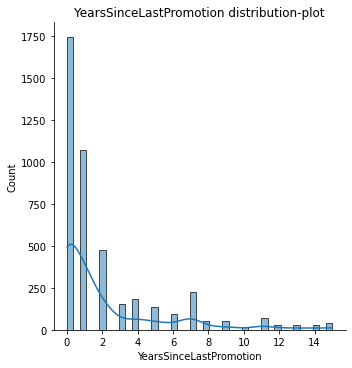

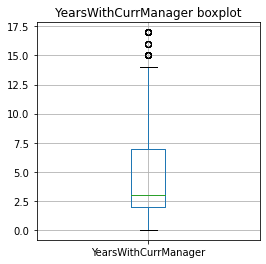

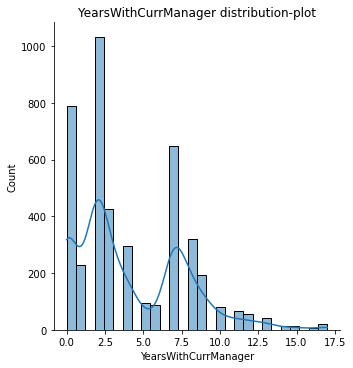

In [5]:
lst=['Age', 'DistanceFromHome','MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
for i in lst:
    #checking using boxplot
    plt.figure(figsize=(4,4))
    df.boxplot(column=i)
    plt.title(i+' boxplot',fontsize=12)
    #checking using distribution plot
    sns.displot(data=df, x=i, kde=True)
    plt.title(i+' distribution-plot',fontsize=12)

In [6]:
for i in lst:
    print(df[i].describe())

count    4410.000000
mean       36.923810
std         9.133301
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64
count    4410.000000
mean        9.192517
std         8.105026
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64
count      4410.000000
mean      65029.312925
std       47068.888559
min       10090.000000
25%       29110.000000
50%       49190.000000
75%       83800.000000
max      199990.000000
Name: MonthlyIncome, dtype: float64
count    4391.000000
mean        2.694830
std         2.498887
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64
count    4410.000000
mean       15.209524
std         3.659108
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Na

In [7]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [8]:
df.fillna({'NumCompaniesWorked':df['NumCompaniesWorked'].median(),'TotalWorkingYears':df['TotalWorkingYears'].mode()[0]},inplace=True)
df.isna().sum() # confirming if all null values are filled

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [9]:
outliers_list=['YearsSinceLastPromotion','TotalWorkingYears','YearsAtCompany','NumCompaniesWorked']
for i in outliers_list:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    l_lim=Q1-1.5*IQR
    u_lim=Q3+1.5*IQR
    df[i].where(df[i] >=l_lim,l_lim, inplace=True)  #replacing all lower outliers with lower limit
    df[i].where(df[i] <=u_lim,u_lim, inplace=True)  #replacing all upper outliers with upper-limit

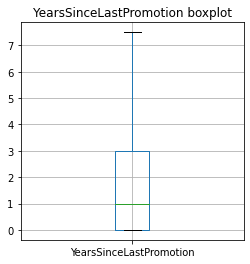

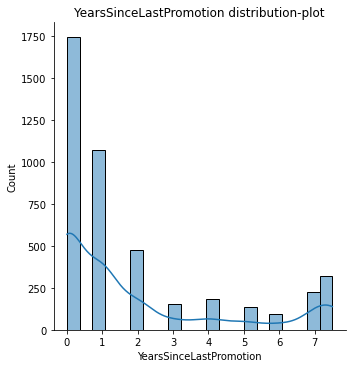

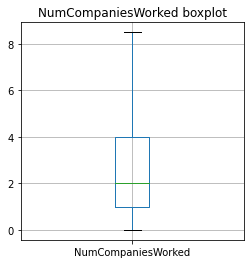

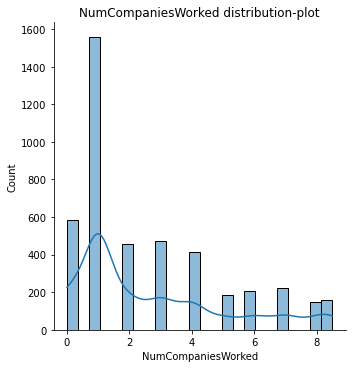

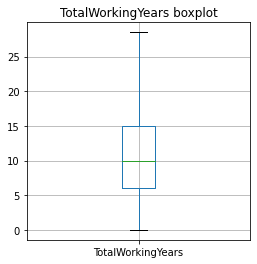

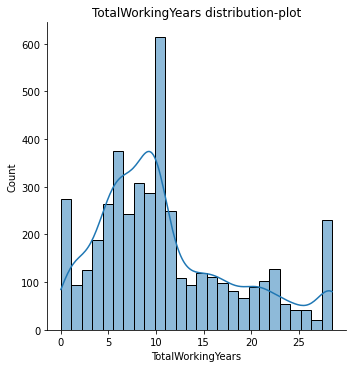

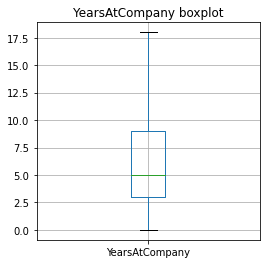

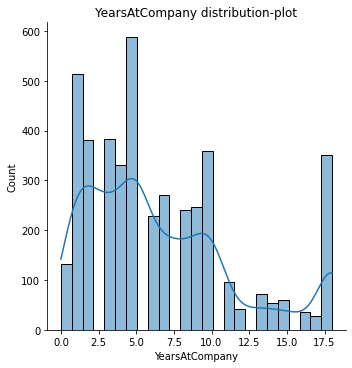

In [10]:
lst=['YearsSinceLastPromotion','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany']
for i in lst:
    #checking using boxplot
    plt.figure(figsize=(4,4))
    df.boxplot(column=i)
    plt.title(i+' boxplot',fontsize=12)
    #checking using distribution plot
    sns.displot(data=df, x=i, kde=True)
    plt.title(i+' distribution-plot',fontsize=12)

In [11]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.674150,15.209524,8.0,0.793878,11.100794,2.799320,6.617687,1.922789,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.450497,3.659108,0.0,0.851883,7.297294,1.288978,4.988656,2.477660,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,8.500000,25.000000,8.0,3.000000,28.500000,6.000000,18.000000,7.500000,17.000000


In [12]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion    float64
YearsWithCurrManager         int64
dtype: object

In [13]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype('int')
df['TotalWorkingYears'] = df['TotalWorkingYears'].astype('int')

In [14]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.656463,15.209524,8.0,0.793878,11.079365,2.799320,6.617687,1.922789,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.409841,3.659108,0.0,0.851883,7.246717,1.288978,4.988656,2.477660,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,8.000000,25.000000,8.0,3.000000,28.000000,6.000000,18.000000,7.500000,17.000000


In [15]:
#removing the unnecessary columns
df.drop(columns=['EmployeeCount','EmployeeID','StandardHours','Over18'],inplace=True)

In [16]:
#saving a copy
df2=df.copy()

In [17]:
#Features and target
y=df['Attrition']
# X=df.drop('Attrition',axis=1,inplace=True)
X=df.drop('Attrition',axis=1)

In [18]:
X=df.copy()

In [19]:
#encoding the categorical features
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
ohe = make_column_transformer(
    (OneHotEncoder(drop='first'), ['BusinessTravel','Department','EducationField','Gender','JobRole', 'MaritalStatus']),
    remainder='passthrough')
ohencoded = ohe.fit_transform(X)
ohencoded_X = pd.DataFrame(ohencoded, columns=ohe.get_feature_names_out())
# output_ohe=open('ohe.pickle','wb')
# pickle.dump(ohe,output_ohe)
# output_ohe.close()
X=ohencoded_X.copy()
X.head()

,onehotencoder__BusinessTravel_Travel_Frequently,onehotencoder__BusinessTravel_Travel_Rarely,onehotencoder__Department_Research & Development,onehotencoder__Department_Sales,onehotencoder__EducationField_Life Sciences,onehotencoder__EducationField_Marketing,onehotencoder__EducationField_Medical,onehotencoder__EducationField_Other,onehotencoder__EducationField_Technical Degree,onehotencoder__Gender_Male,...,remainder__JobLevel,remainder__MonthlyIncome,remainder__NumCompaniesWorked,remainder__PercentSalaryHike,remainder__StockOptionLevel,remainder__TotalWorkingYears,remainder__TrainingTimesLastYear,remainder__YearsAtCompany,remainder__YearsSinceLastPromotion,remainder__YearsWithCurrManager
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,131160,1,11,0,1,6,1,0.0,0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,41890,0,23,1,6,3,5,1.0,4
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,4,193280,1,15,3,5,2,5,0.0,3
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,83210,3,11,3,13,5,8,7.0,5
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1,23420,4,12,2,9,2,6,0.0,4


In [20]:
X.dtypes

onehotencoder__BusinessTravel_Travel_Frequently     object
onehotencoder__BusinessTravel_Travel_Rarely         object
onehotencoder__Department_Research & Development    object
onehotencoder__Department_Sales                     object
onehotencoder__EducationField_Life Sciences         object
onehotencoder__EducationField_Marketing             object
onehotencoder__EducationField_Medical               object
onehotencoder__EducationField_Other                 object
onehotencoder__EducationField_Technical Degree      object
onehotencoder__Gender_Male                          object
onehotencoder__JobRole_Human Resources              object
onehotencoder__JobRole_Laboratory Technician        object
onehotencoder__JobRole_Manager                      object
onehotencoder__JobRole_Manufacturing Director       object
onehotencoder__JobRole_Research Director            object
onehotencoder__JobRole_Research Scientist           object
onehotencoder__JobRole_Sales Executive              obje

In [23]:
#min-max scaling
from sklearn.preprocessing import StandardScaler
# mm_scale=MinMaxScaler(feature_range=(0,1))
mm_scale=StandardScaler()
X_std=mm_scale.fit_transform(X)
print(X_std)
X=pd.DataFrame(X_std,columns = X.columns)
X.head()
# output_mm_scale=open('mm_scale.pickle','wb')
# pickle.dump(mm_scale,output_mm_scale)
# output_mm_scale.close()


ValueError: could not convert string to float: 'No'

In [ ]:
#importing the modelling libraries
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
#creating a dictionary of models for easy reference
models = {
    '     Gaussian Naive Bayes' : GaussianNB(),
    '  Multinomial Naive Bayes' : MultinomialNB(),
    '    Bernoulli Naive Bayes' : BernoulliNB(),
    '  Categorical Naive Bayes' : CategoricalNB(),
    '      Logistic Regression' : LogisticRegression(),
    '     KNeighborsClassifier' : KNeighborsClassifier(),
    '               SVC Linear' : SVC(kernel='linear'),
    '           SVC Polynomial' : SVC(kernel='poly',degree=2),
    '                  SVC RBF' : SVC(kernel='rbf'),
    ' Decision Tree Classifier' : DecisionTreeClassifier(),
    ' Random Forest Classifier' : RandomForestClassifier()
}

In [ ]:
y=y.map({'No':0,'Yes':1})
y

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.3,stratify = y) # 30% data is for testing
print(y_test.value_counts())
print(y_train.value_counts())

In [ ]:
#training of the various models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' is trained.')

In [ ]:
#defining functions for evaluation of various models
def get_confusion_matrix(y_test,prediction):
    conf_matrix = confusion_matrix(y_test,prediction)
    return conf_matrix
def get_accuracy_score(y_test,prediction):
    accuracy = accuracy_score(y_test,prediction)
    return accuracy
def get_precision_score(y_test,prediction):
    precision = precision_score(y_test,prediction)
    return precision
def get_recall_score(y_test,prediction):
    recall = recall_score(y_test,prediction)
    return recall
def get_f1_score(y_test,prediction):
    f1 = f1_score(y_test,prediction)
    return f1
def get_cross_val_score(model,X_train,y_train):
    cross_val_scores = cross_val_score(model,X_train,y_train,cv=10)
    avg_cross_val_score=cross_val_scores.mean()
    return avg_cross_val_score
def get_roc_auc_score(y_test,prediction):
    roc_auc = roc_auc_score(y_test,prediction)
    return roc_auc

In [ ]:
# Dataframe for capturing the different scores of various models
met= pd.DataFrame(columns = ["Confusion_matrix", "Accuracy", "F1_score","Recall","Precision", "Cross_validation","ROC_AUC"],
                  index=['     Gaussian Naive Bayes','  Multinomial Naive Bayes','    Bernoulli Naive Bayes',
                        '  Categorical Naive Bayes','      Logistic Regression','     KNeighborsClassifier',
                        '               SVC Linear','           SVC Polynomial','                  SVC RBF',
                        ' Decision Tree Classifier',' Random Forest Classifier'])

In [ ]:
# Calculation of different scores of each model
for name, model in models.items():
    prediction = model.predict(X_test)
    con_matrix = get_confusion_matrix(y_test, prediction)
    met.at[name,"Confusion_matrix"]=con_matrix
    acc = get_accuracy_score(y_test, prediction)
    met.at[name,"Accuracy"]=acc
    f1 = get_f1_score(y_test, prediction)
    met.at[name,"F1_score"]=f1
    recal = get_recall_score(y_test, prediction)
    met.at[name,"Recall"]=recal
    prec = get_precision_score(y_test, prediction)
    met.at[name,"Precision"]=prec
    xval = get_cross_val_score(model,X_train,y_train)
    met.at[name,"Cross_validation"]=xval
    roc = get_roc_auc_score(y_test, prediction)
    met.at[name,"ROC_AUC"]=roc
met   